# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Мы научимся обрабатывать пропуски в данных для количественных (числовых) и категориальных признаков и масштабировать данные. Также мы научимся преобразовывать категориальные признаки в числовые.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
pd.set_option("display.width", 70)

## Загрузка и первичный анализ данных

Используем данные из соревнования [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('data/gun_violence.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(162867, 29)

In [4]:
# типы колонок
data.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         12303
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        276
incident_url_fields_missing         0
congressional_district           4865
gun_stolen                      99311
gun_type                        99299
incident_characteristics          242
latitude                         4715
location_description           140476
longitude                        4715
n_guns_involved                 99299
notes                           56008
participant_age                 63464
participant_age_group           27678
participant_gender              23832
participant_name                84207
participant_relationship       152618
participant_status              18510
participant_type                16327
sources     

In [6]:
# Первые 5 строк датасета
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 162867


# 1. Обработка пропусков в данных

## 1.1. Простые стратегии - удаление или заполнение нулями

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((162867, 29), (162867, 8))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((162867, 29), (450, 29))

In [10]:
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,0,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,0.0,0.0
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,0,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,0,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,0,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


## 1.2. "Внедрение значений" - импьютация (imputation)

### 1.2.1. Обработка пропусков в числовых данных

In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка congressional_district. Тип данных float64. Количество пустых значений 4865, 2.99%.
Колонка latitude. Тип данных float64. Количество пустых значений 4715, 2.9%.
Колонка longitude. Тип данных float64. Количество пустых значений 4715, 2.9%.
Колонка n_guns_involved. Тип данных float64. Количество пустых значений 99299, 60.97%.
Колонка state_house_district. Тип данных float64. Количество пустых значений 24163, 14.84%.
Колонка state_senate_district. Тип данных float64. Количество пустых значений 20659, 12.68%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
0,14.0,40.3467,-79.8559,NaN,NaN,NaN
1,43.0,33.9090,-118.3330,NaN,62.0,35.0
2,9.0,41.4455,-82.1377,2.0,56.0,13.0
3,6.0,39.6518,-104.8020,NaN,40.0,28.0
4,6.0,36.1140,-79.9569,2.0,62.0,27.0
...,...,...,...,...,...,...
162862,13.0,33.7938,-84.5894,1.0,39.0,38.0
162863,13.0,37.7338,-122.1790,1.0,18.0,9.0
162864,NaN,NaN,NaN,1.0,NaN,NaN
162865,1.0,34.2190,-88.7378,1.0,16.0,7.0


/home/dan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


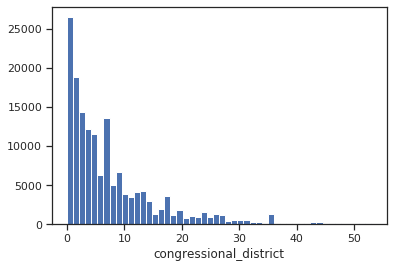

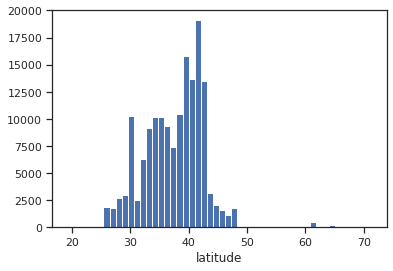

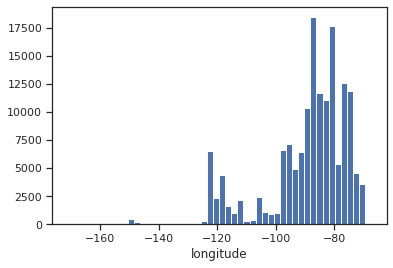

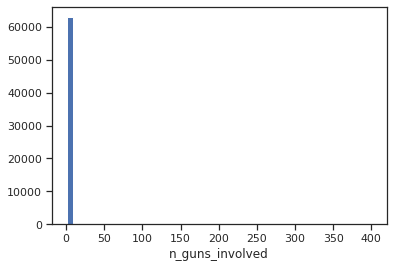

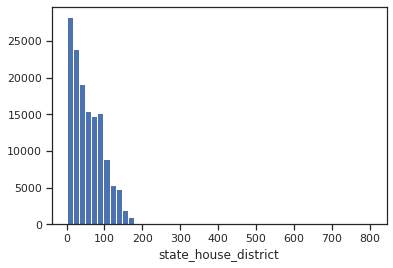

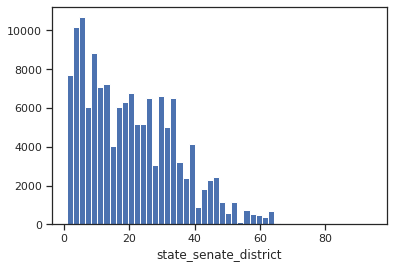

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [15]:
# Фильтр по пустым значениям поля n_guns_involved 
data[data['n_guns_involved'].isnull()]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161927,729430,2016-12-16,Wisconsin,Madison,Fourth Street,0,0,http://www.gunviolencearchive.org/incident/729430,http://www.nbc15.com/content/news/2-teens-arre...,False,...,0::18||1::18,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Taylor Loving||1::Theron Walker,NaN,"0::Unharmed, Arrested||1::Unharmed, Arrested",0::Subject-Suspect||1::Subject-Suspect,http://www.nbc15.com/content/news/2-teens-arre...,76.0,26.0
162166,730843,2016-12-18,Florida,Naples,Pine Ridge Rd and Airport Pulling Road,0,0,http://www.gunviolencearchive.org/incident/730843,http://www.naplesnews.com/story/news/crime/201...,False,...,0::24,0::Adult 18+,0::Male,0::Sean Blackwell,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.naplesnews.com/story/news/crime/201...,106.0,23.0
162373,729453,2016-12-19,California,Brawley,500 block of North Imperial,1,0,http://www.gunviolencearchive.org/incident/729453,http://www.kyma.com/news/fatal-officer-involve...,False,...,NaN,0::Adult 18+,0::Male,NaN,NaN,0::Killed,0::Subject-Suspect,http://www.kyma.com/news/fatal-officer-involve...,56.0,40.0
162740,730974,2016-12-21,Arkansas,Fayetteville,800 South School Avenue,1,0,http://www.gunviolencearchive.org/incident/730974,http://www.4029tv.com/article/officer-involved...,False,...,0::25,0::A

In [16]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['n_guns_involved'].isnull()].index
flt_index

Int64Index([     0,      1,      3,      5,      7,      8,      9,
                14,     17,     19,
            ...
            160630, 160803, 160878, 161236, 161836, 161927, 162166,
            162373, 162740, 162801],
           dtype='int64', length=99299)

In [17]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161927,729430,2016-12-16,Wisconsin,Madison,Fourth Street,0,0,http://www.gunviolencearchive.org/incident/729430,http://www.nbc15.com/content/news/2-teens-arre...,False,...,0::18||1::18,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Taylor Loving||1::Theron Walker,NaN,"0::Unharmed, Arrested||1::Unharmed, Arrested",0::Subject-Suspect||1::Subject-Suspect,http://www.nbc15.com/content/news/2-teens-arre...,76.0,26.0
162166,730843,2016-12-18,Florida,Naples,Pine Ridge Rd and Airport Pulling Road,0,0,http://www.gunviolencearchive.org/incident/730843,http://www.naplesnews.com/story/news/crime/201...,False,...,0::24,0::Adult 18+,0::Male,0::Sean Blackwell,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.naplesnews.com/story/news/crime/201...,106.0,23.0
162373,729453,2016-12-19,California,Brawley,500 block of North Imperial,1,0,http://www.gunviolencearchive.org/incident/729453,http://www.kyma.com/news/fatal-officer-involve...,False,...,NaN,0::Adult 18+,0::Male,NaN,NaN,0::Killed,0::Subject-Suspect,http://www.kyma.com/news/fatal-officer-involve...,56.0,40.0
162740,730974,2016-12-21,Arkansas,Fayetteville,800 South School Avenue,1,0,http://www.gunviolencearchive.org/incident/730974,http://www.4029tv.com/article/officer-involved...,False,...,0::25,0::A

In [18]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['n_guns_involved']

0        NaN
1        NaN
3        NaN
5        NaN
7        NaN
          ..
161927   NaN
162166   NaN
162373   NaN
162740   NaN
162801   NaN
Name: n_guns_involved, Length: 99299, dtype: float64

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html#impute

In [116]:
data_num_guns = data_num[['n_guns_involved']]
data_num_guns.head()

,n_guns_involved
0,NaN
1,NaN
2,2.0
3,NaN
4,2.0


In [117]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [118]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_guns)
mask_missing_values_only

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

С помощью класса [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) можно проводить импьютацию различными [показателями центра распределения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F)

In [119]:
strategies=['mean', 'median','most_frequent']

In [120]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_guns)
    return data_num_imp[mask_missing_values_only]

In [121]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([1.5237069, 1.5237069, 1.5237069, ..., 1.5237069, 1.5237069,
        1.5237069]))

In [122]:
strategies[1], test_num_impute(strategies[1])

('median', array([1., 1., 1., ..., 1., 1., 1.]))

In [123]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([1., 1., 1., ..., 1., 1., 1.]))

In [124]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [125]:
test_num_impute_col(data, 'n_guns_involved', strategies[0])

('n_guns_involved', 'mean', 99299, 1.5237068965517242, 1.5237068965517242)

In [126]:
test_num_impute_col(data, 'n_guns_involved', strategies[1])

('n_guns_involved', 'median', 99299, 1.0, 1.0)

In [127]:
test_num_impute_col(data, 'n_guns_involved', strategies[2])

('n_guns_involved', 'most_frequent', 99299, 1.0, 1.0)

### 1.2.2. Обработка пропусков в категориальных данных

In [128]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка address. Тип данных object. Количество пустых значений 12303, 7.55%.
Колонка source_url. Тип данных object. Количество пустых значений 276, 0.17%.
Колонка gun_stolen. Тип данных object. Количество пустых значений 99311, 60.98%.
Колонка gun_type. Тип данных object. Количество пустых значений 99299, 60.97%.
Колонка incident_characteristics. Тип данных object. Количество пустых значений 242, 0.15%.
Колонка location_description. Тип данных object. Количество пустых значений 140476, 86.25%.
Колонка notes. Тип данных object. Количество пустых значений 56008, 34.39%.
Колонка participant_age. Тип данных object. Количество пустых значений 63464, 38.97%.
Колонка participant_age_group. Тип данных object. Количество пустых значений 27678, 16.99%.
Колонка participant_gender. Тип данных object. Количество пустых значений 23832, 14.63%.
Колонка participant_name. Тип данных object. Количество пустых значений 84207, 51.7%.
Колонка participant_relationship. Тип данных object. Количество пустых з

Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".

In [129]:
cat_temp_data = data[['gun_stolen']]
cat_temp_data.head()

,gun_stolen
0,NaN
1,NaN
2,0::Unknown||1::Unknown
3,NaN
4,0::Unknown||1::Unknown


In [130]:
cat_temp_data['gun_stolen'].unique()[0:10]

array([nan, '0::Unknown||1::Unknown', '0::Unknown',
       '0::Unknown||1::Unknown||2::Unknown||3::Unknown',
       '0::Not-stolen||1::Unknown', '0::Unknown||1::Unknown||2::Unknown',
       '0::Stolen||1::Stolen', '0::Not-stolen', '0::Stolen',
       '0::Stolen||1::Stolen||2::Unknown||3::Unknown'], dtype=object)

In [131]:
cat_temp_data[cat_temp_data['gun_stolen'].isnull()].shape

(99311, 1)

In [132]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['0::Unknown'],
       ['0::Unknown'],
       ['0::Unknown||1::Unknown'],
       ...,
       ['0::Unknown'],
       ['0::Unknown'],
       ['0::Unknown']], dtype=object)

In [133]:
# Пустые значения отсутствуют
np.unique(data_imp2)[0:5]

array(['0::Not-stolen', '0::Not-stolen||1::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen'],
      dtype=object)

In [134]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['!!!'],
       ['!!!'],
       ['0::Unknown||1::Unknown'],
       ...,
       ['0::Unknown'],
       ['0::Unknown'],
       ['0::Unknown']], dtype=object)

In [135]:
np.unique(data_imp3)[0:5]

array(['!!!', '0::Not-stolen', '0::Not-stolen||1::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen'],
      dtype=object)

In [136]:
data_imp3[data_imp3=='!!!'].size

99311

# 2. Преобразование категориальных признаков в числовые

In [137]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,0::Unknown
1,0::Unknown
2,0::Unknown||1::Unknown
3,0::Unknown
4,0::Unknown||1::Unknown
...,...
162862,0::Unknown
162863,0::Unknown
162864,0::Unknown
162865,0::Unknown


## 2.1. Кодирование категорий целочисленными значениями - [label encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [138]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [139]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [140]:
cat_enc['c1'].unique()[0:5]

array(['0::Unknown', '0::Unknown||1::Unknown',
       '0::Unknown||1::Unknown||2::Unknown||3::Unknown',
       '0::Not-stolen||1::Unknown', '0::Unknown||1::Unknown||2::Unknown'],
      dtype=object)

In [141]:
np.unique(cat_enc_le)[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [142]:
le.inverse_transform([0, 1, 2, 3])

array(['0::Not-stolen', '0::Not-stolen||1::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen'],
      dtype=object)

## 2.2. Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [143]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [144]:
cat_enc.shape

(162867, 1)

In [145]:
cat_enc_ohe.shape

(162867, 277)

In [146]:
cat_enc_ohe

<162867x277 sparse matrix of type '<class 'numpy.float64'>'
	with 162867 stored elements in Compressed Sparse Row format>

In [147]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [148]:
cat_enc.head(10)

,c1
0,0::Unknown
1,0::Unknown
2,0::Unknown||1::Unknown
3,0::Unknown
4,0::Unknown||1::Unknown
5,0::Unknown
6,0::Unknown||1::Unknown
7,0::Unknown
8,0::Unknown
9,0::Unknown


# 3. Масштабирование данных

Термины "масштабирование" и "нормализация" часто используются как синонимы. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два подхода:
- MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

В этом случае значения лежат в диапазоне от 0 до 1.
- Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0):
$$ x_{новый} = \frac{x_{старый} - AVG(X) }{\sigma(X)} $$

В этом случае большинство значений попадает в диапазон от -3 до 3.

где $X$ - матрица объект-признак, $AVG(X)$ - среднее значение, $\sigma$ - среднеквадратичное отклонение.

In [149]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## 3.1. [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [150]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['n_killed']])

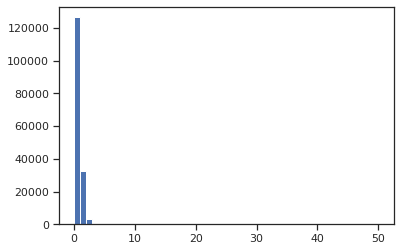

In [151]:
plt.hist(data['n_killed'], 50)
plt.show()

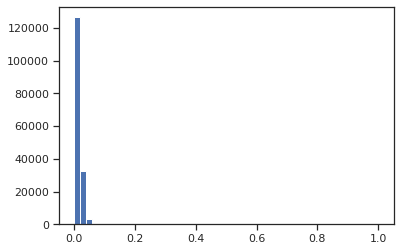

In [152]:
plt.hist(sc1_data, 50)
plt.show()

## 3.2. Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [153]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['n_killed']])

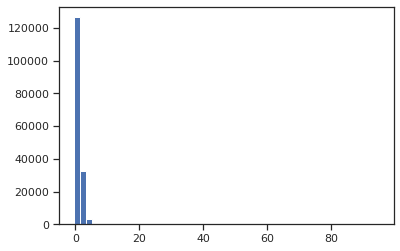

In [154]:
plt.hist(sc2_data, 50)
plt.show()

## 3.3. [Нормализация данных](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

In [155]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['n_killed']])

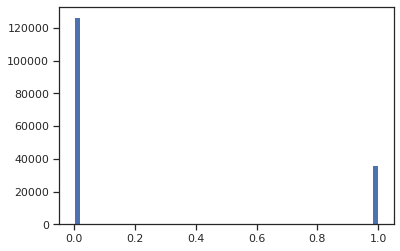

In [156]:
plt.hist(sc3_data, 50)
plt.show()